600
[[-22.29347737 -37.35443154  17.41894426]
 [-21.99044914 -37.0604902   17.11591555]
 [-21.68742091 -36.76654886  16.81288684]
 ...
 [  6.80417469  10.60422089 -11.71551581]
 [  7.10720292  10.89816223 -12.01854452]
 [  7.41023114  11.19210357 -12.32157324]]
[[2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 ...
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]]


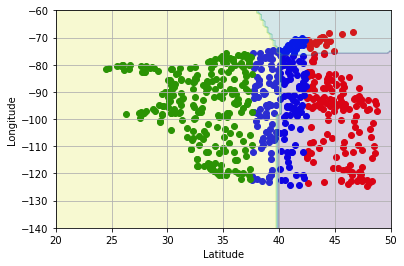

In [80]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import sklearn


df = pd.read_csv("ENGR_518_Solar_energy_datasets.csv")


x=df.iloc[:, 3:5]

df.insert(df.shape[1], 'class', 0)
# print(df)
# df.iat[0, 8]
for i in range(0,925):
    if df.iat[i, 5]<=320:
        df.iat[i, 8]=0
    elif 320<df.iat[i, 5]<=340:
        df.iat[i, 8]=1
    else:
        df.iat[i, 8]=2
# print(df.iloc[:,5:])
y=df.iloc[:,8]
# print(y)
df.to_csv('myENGR_518_Solar_energy_datasets.csv')
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=600, random_state=None)
# print(X_test,y_test)
x1=X_train.iloc[:, 0]#Latitude
x2=X_train.iloc[:, 1]#Longitude
x3=X_test.iloc[:,0]
x4=X_test.iloc[:,1]
# print(y_train)

# print(x1)
colors=('r','b', 'g')
plt.scatter(x1[y==0],x2[y==0],c=colors[0])
plt.scatter(x1[y==1],x2[y==1],c=colors[1])
plt.scatter(x1[y==2],x2[y==2],c=colors[2]) 
plt.grid(1)
# plt.grid(1)
# plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel('Latitude')
plt.ylabel('Longitude')



# train model1
y1=y_train.copy()
y1[y!=0]=-1
# print(y1[0])
y1[y==0]=1
print(len(y1))
# print(y1)
log_regress1 = linear_model.LogisticRegression()
log_regress1.fit(X_train,y1)
# x1p=np.linspace(1,5,20)
#x2p=-(log_regress1.intercept_+log_regress1.coef_[0][0]*x1p)/log_regress1.coef_[0][1]
# print(log_regress1.predict(X_train))



# train model2
y2=y_train.copy()
y2[y!=1]=-1
y2[y==1]=1
# print(y2) 
log_regress2 = linear_model.LogisticRegression()
log_regress2.fit(X_train,y2)
# print(log_regress2.predict(X_train))



# train model3

y3=y_train.copy()
y3[y!=2]=-1
y3[y==2]=1
log_regress3 = linear_model.LogisticRegression()
log_regress3.fit(X_train,y3)
# print(log_regress3.predict(X_train))
xp1, xp2 = np.meshgrid(np.linspace(20,50,100),np.linspace(-140,-60,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
# print(xp1_v.shape,xp1.shape)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)

loss1,loss2,loss3=0,0,0
ya=log_regress1.predict(X_train)
yb=log_regress2.predict(X_train)
yc=log_regress3.predict(X_train)

# for i in range(0,len(y1)):
#     if y1.iloc(i)==ya[i]:
#         loss1+=1
# for i in range(0,len(y1)):
#     if y2[i]==yb[i]:
#         loss3+=1
# for i in range(0,len(y1)):
#     if y3[i]==yc[i]:
#         loss3+=1
# print("loss1=",loss1,"loss2=",loss2,"loss3=",loss3)







# calculate model outputs
c1=(log_regress1.intercept_+np.dot(Xp_data,log_regress1.coef_.T))/np.linalg.norm(log_regress1.coef_)
# print(c1)
c2=(log_regress2.intercept_+np.dot(Xp_data,log_regress2.coef_.T))/np.linalg.norm(log_regress2.coef_)
# print(c2)
c3=(log_regress3.intercept_+np.dot(Xp_data,log_regress3.coef_.T))/np.linalg.norm(log_regress3.coef_)
# append and reshape to plot
c=np.hstack((c1,c2,c3))
print(c)
z=np.argmax(c,axis=1)
# print(z)
z=z.reshape(xp1.shape)
print(z)
plt.contourf(xp1,xp2,z,alpha=.2)







(600, 2) (600,)


ValueError: Length of values (1) does not match length of index (600)

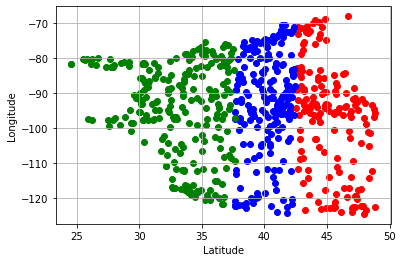

In [94]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import sklearn


df = pd.read_csv("ENGR_518_Solar_energy_datasets.csv")


x=df.iloc[:, 3:5]

df.insert(df.shape[1], 'class', 0)
# print(df)
# df.iat[0, 8]
for i in range(0,925):
    if df.iat[i, 5]<=320:
        df.iat[i, 8]=0
    elif 320<df.iat[i, 5]<=340:
        df.iat[i, 8]=1
    else:
        df.iat[i, 8]=2
# print(df.iloc[:,5:])
y=df.iloc[:,8]
# print(y)
df.to_csv('myENGR_518_Solar_energy_datasets.csv')
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=600, random_state=None)
# print(X_test,y_test)
x1=X_train.iloc[:, 0]#Latitude
x2=X_train.iloc[:, 1]#Longitude
x3=X_test.iloc[:,0]
x4=X_test.iloc[:,1]
# print(y_train)

# print(x1)
colors=('r','b', 'g')
plt.scatter(x1[y==0],x2[y==0],c=colors[0])
plt.scatter(x1[y==1],x2[y==1],c=colors[1])
plt.scatter(x1[y==2],x2[y==2],c=colors[2]) 
plt.grid(1)
# plt.grid(1)
# plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# train my model
def model(x_p,w):
    # compute linear comb and return
    a = w[0] + np.dot(x_p,w[1:])
    return a.T
#********************************softmax***********************************#
# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

# the convex cross-entropy cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))
#********************************softmax***********************************#

def self_gradienr(g):
    def partial(w):
        gap=0.0001
        w0_a=[w[0]-w[0]*0.00005, w[1], w[2]]
        w0_b=[w[0]+w[0]*0.00005, w[1], w[2]]
        w1_a=[w[0], w[1]-w[1]*0.00005, w[2]]
        w1_b=[w[0], w[1]+w[1]*0.00005, w[2]]
        w2_a=[w[0], w[1], w[2]-w[2]*0.00005]
        w2_b=[w[0], w[1], w[2]+w[2]*0.00005]
        
        w0_gradient=(g(w0_b)-g(w0_a))/(gap*w[0])
        w1_gradient=(g(w1_b)-g(w1_a))/(gap*w[1])
        w2_gradient=(g(w2_b)-g(w2_a))/(gap*w[2])
        
        return [w0_gradient, w1_gradient, w2_gradient]
    return partial


def gradient_descent(g, step, max_its, w, p):
    # compute gradient
    gradient = self_gradienr(g)
    # gradient descent loop
    #w = np.array([[1.], [1.]])
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd': # diminishing step
            alpha = 1/(k+1)
        else: # constant step
            alpha = step
        w = w - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

def c(t):
    c = softmax(t)
    return c

iter=100
w = np.array([[1.], [1.], [1.]])

#----------------------------------------- train model1--------------------------------------------------------------
y1=y_train.copy()
y1[y!=0]=-1
# print(y1[0])
y1[y==0]=1
print(X_train.shape,y1.shape)
# print(model(X_train,w).shape,-y1*model(X_train)
def softmax1(w):
    cost = np.sum(np.log(1 + np.exp(-y1*model(X_train,w))))
    return cost/float(np.size(y))
def c(t):
    c = softmax1(t)
    return c
a, b = gradient_descent(c,0.1,iter,w,0)

# x1p=np.linspace(1,5,20)
#x2p=-(log_regress1.intercept_+log_regress1.coef_[0][0]*x1p)/log_regress1.coef_[0][1]
# print(log_regress1.predict(X_train))



# -------------------------------------------train model2---------------------------------------------------------
y2=y_train.copy()
y2[y!=1]=-1
y2[y==1]=1
# print(y2) 
log_regress2 = linear_model.LogisticRegression()
log_regress2.fit(X_train,y2)
# print(log_regress2.predict(X_train))



# ----------------------------------------------train model3------------------------------------------------------

y3=y_train.copy()
y3[y!=2]=-1
y3[y==2]=1
log_regress3 = linear_model.LogisticRegression()
log_regress3.fit(X_train,y3)
# print(log_regress3.predict(X_train))
xp1, xp2 = np.meshgrid(np.linspace(20,50,100),np.linspace(-140,-60,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
# print(xp1_v.shape,xp1.shape)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)

loss1,loss2,loss3=0,0,0
ya=log_regress1.predict(X_train)
yb=log_regress2.predict(X_train)
yc=log_regress3.predict(X_train)

# for i in range(0,len(y1)):
#     if y1.iloc(i)==ya[i]:
#         loss1+=1
# for i in range(0,len(y1)):
#     if y2[i]==yb[i]:
#         loss3+=1
# for i in range(0,len(y1)):
#     if y3[i]==yc[i]:
#         loss3+=1
# print("loss1=",loss1,"loss2=",loss2,"loss3=",loss3)







# calculate model outputs
c1=(log_regress1.intercept_+np.dot(Xp_data,log_regress1.coef_.T))/np.linalg.norm(log_regress1.coef_)
# print(c1)
c2=(log_regress2.intercept_+np.dot(Xp_data,log_regress2.coef_.T))/np.linalg.norm(log_regress2.coef_)
# print(c2)
c3=(log_regress3.intercept_+np.dot(Xp_data,log_regress3.coef_.T))/np.linalg.norm(log_regress3.coef_)
# append and reshape to plot
c=np.hstack((c1,c2,c3))
print(c)
z=np.argmax(c,axis=1)
# print(z)
z=z.reshape(xp1.shape)
print(z)
plt.contourf(xp1,xp2,z,alpha=.2)





